# Neural Networks

Watch this 3Blue1Brown video: https://www.youtube.com/watch?v=aircAruvnKk

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# np.random.seed(42)

import tensorflow.keras as keras
import tensorflow as tf


Keras is a Python wrapper that makes it easier to work with Google's TensorFlow

If a neural network has any "Hidden Layers" then its called DeepLearning



In [6]:
# Dataset 60k images of 28x28 of handdrawn numbers
mnist = tf.keras.datasets.mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data() # notice the syntax is similar to train_test_split, even the order is different

train_X.shape # returns (60000, 28, 28) 60k images of 28 x 28

train_X[0][:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=uint8)

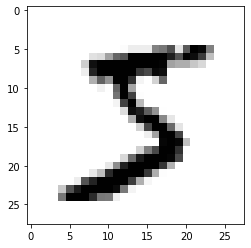

In [8]:
plt.imshow(
    train_X[0], # just give it our first image
    cmap = plt.cm.binary # cmap = colormap, we're saying binary (grayscale)
)

plt.show()

In [9]:
train_y[0] # so we check our Training data, the target for it, and we see that's what its classified as, a 5! 

5

Andrew Ing, DeepLearning Researcher from Princeton

### Normalization

In [10]:
train_X.shape

(60000, 28, 28)

In [12]:
# convert this into a set to see all the unique values of that image
# reshape and ravel to get a 1-dimensional, flat array
set(train_X[0].reshape(-1, 1).ravel()) # each value ranges from 0 to 255


{0,
 1,
 2,
 3,
 9,
 11,
 14,
 16,
 18,
 23,
 24,
 25,
 26,
 27,
 30,
 35,
 36,
 39,
 43,
 45,
 46,
 49,
 55,
 56,
 64,
 66,
 70,
 78,
 80,
 81,
 82,
 90,
 93,
 94,
 107,
 108,
 114,
 119,
 126,
 127,
 130,
 132,
 133,
 135,
 136,
 139,
 148,
 150,
 154,
 156,
 160,
 166,
 170,
 171,
 172,
 175,
 182,
 183,
 186,
 187,
 190,
 195,
 198,
 201,
 205,
 207,
 212,
 213,
 219,
 221,
 225,
 226,
 229,
 238,
 240,
 241,
 242,
 244,
 247,
 249,
 250,
 251,
 252,
 253,
 255}

In [14]:
# see it goes from 1-255, we want it to be scaled to 0-1!

# Built in Normalizer in Keras
train_X = tf.keras.utils.normalize(train_X, axis = 1)
test_X = tf.keras.utils.normalize(test_X, axis = 1)

In [16]:
set(train_X[0].reshape(-1, 1).ravel()) # now we can see that its scaled the above data between 0 and 1

{0.0,
 0.001291638275603334,
 0.0017157656927661758,
 0.002583276551206668,
 0.0029117418490504305,
 0.0039312436435731965,
 0.006250335720407404,
 0.013126034057736942,
 0.014256948070666159,
 0.01601458016977737,
 0.016223782922246823,
 0.023329551388362804,
 0.023335171658199007,
 0.023598229705086286,
 0.025373104769234954,
 0.026205676641453873,
 0.026252068115473884,
 0.0408993336947506,
 0.04117837662638822,
 0.04431706172896948,
 0.045002250168764066,
 0.04586450917502063,
 0.05110616736645155,
 0.05298496674891638,
 0.05664824129382238,
 0.0578048631247428,
 0.05882701980512324,
 0.05945041980090344,
 0.06524512654946131,
 0.06551419160363468,
 0.0669700625281599,
 0.10191096471676507,
 0.10498298124763263,
 0.11198800009007391,
 0.11646967396201723,
 0.11664775694181402,
 0.11961606534067908,
 0.12250612545941328,
 0.12298800925361815,
 0.12760592112762187,
 0.128578814918233,
 0.1493173334534319,
 0.15214552134447223,
 0.15370495479679672,
 0.15414630166598078,
 0.1573101977

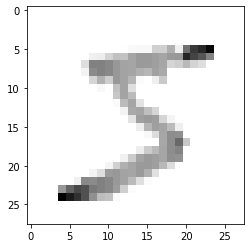

In [15]:
plt.imshow(train_X[0], cmap = plt.cm.binary)
plt.show() # so we have SCALED the image to values between 0 and 1

Model

create instance of Sequential model:

In [17]:
model = tf.keras.models.Sequential()

add input layer: (this the first, left-most layer)

In [19]:
model.add(tf.keras.layers.Flatten()) # flattens our input array, determines the total number of neurons in the input layer

Add `.Dense` hidden layer

* in a densely-connected layer, each node connects to each prior and subsequent node

In [20]:
model.add(tf.keras.layers.Dense( # instead of flattening the layer
    128, # number of nodes, completely arbitrary, this is the "hyperparameter" to experiment with
    activation = tf.nn.sigmoid, # use the Sigmoid function like in the video
))

Add a second hidden layer: (as you increase neurons/nodes and layers, think about the added math involved!)

In [21]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid)) # add an identical layer, the model will add these in the ORDER you add them

Add the final output layer (we don't have to DEFINE it as the final, its just the last added)

In [22]:
model.add(tf.keras.layers.Dense(
    10, # spit back our 0-9
    activation = tf.nn.softmax, # using a different function here at the end
))

the `.softmax` function maps the non-normalized output of a network to a probability distribution

the output of each neuron/node are not normalized, so this softmax function will normalize the final results to a 0-1 range of probability distribution. (as a distribution, remember all probabilities will add up to 1)

In [23]:
model.compile( # if you don't know why to change something, leave it
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'], # report this specific metric of the accuracy
)

In [24]:
model.fit(train_X, train_y, epochs = 3) # epochs is the number of passes through the data

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5303 - accuracy: 0.8556
Epoch 2/3
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2253 - accuracy: 0.9330
Epoch 3/3
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1671 - accuracy: 0.9495


In [25]:
# see how the accuracy increases on each epoch, but it gets a diminishing return the more epochs we run? 

### Validation:

Let's say we don't trust the accuracy above

In [26]:
val_loss, val_acc = model.evaluate(test_X, test_y) # 

print(f'Loss: {val_loss}')
print(f'Accuracy: {val_acc}')


10000/10000 [==============================] - 0s 26us/sample - loss: 0.1506 - accuracy: 0.9534
Loss: 0.15055524591207503
Accuracy: 0.9534000158309937


### Save the model: 

In [27]:
model.save('msint.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: msint.model/assets


### Load a saved model:

In [28]:
prev_model = tf.keras.models.load_model('msint.model')

### Predictions:

In [29]:
predictions = prev_model.predict(test_X)

predictions[0] # returns a list of probability distributions

array([9.4571405e-06, 3.7920652e-06, 1.0493569e-03, 1.2221958e-03,
       4.3127006e-06, 1.4125947e-05, 1.5827077e-08, 9.9764568e-01,
       5.0688009e-06, 4.5948866e-05], dtype=float32)

Convert probability distribution to a single prediction:


In [30]:
max(predictions[0]) # the most probable

0.9976457

So it is very confident in that prediction!!!

In [31]:
print(np.argmax(predictions[0])) # returns the index of the maximum value

7


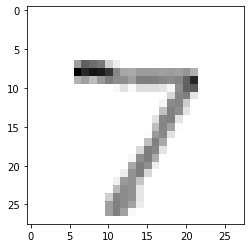

In [33]:
plt.imshow(test_X[0], cmap = plt.cm.binary)
plt.show()

In [34]:
print(np.argmin(predictions[0])) # what number is the model most sure it is NOT?

6


computationally complex? typically go for Neural Networks